In [3]:
import numpy as np
import pandas as pd
import scipy.io
import os
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

In [2]:
IMAGE=[]              # log compressed images aquired from RF data 
path="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Single_freq_imp_data_withpropername/B_mode_image/"
c=0
for name in sorted(os.listdir(path)):
    data=cv2.imread(path+name)
    data=data[:,:,1]
    data=data[:187,:]
    IMAGE.append(data)
Image=np.array(IMAGE) 

In [18]:
CONFIDENCE=[]             # .mat file of from matlab
path="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Single_freq_imp_data_withpropername/confidence_matfile/"
for name in os.listdir(path):
    data = scipy.io.loadmat(path+name)
    data=data["map"]
    data=data[0:187,:]    # cropping the confidence img data to 187x128 
    CONFIDENCE.append(data)
CONFIDENCE=np.array(CONFIDENCE)    
confidence=np.reshape(CONFIDENCE,np.prod(CONFIDENCE.shape))

In [19]:
LABLE=[]                      # annoted/labeled data having labels 0,127,255 --> background,hypoechoic,hyperechoic
path="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Single_freq_imp_data_withpropername/Labeled updated/"
c=0
for name in os.listdir(path):
    data=cv2.imread(path+name)
    data=data[:,:,1]          # as all channels are same taking only green channel
    LABLE.append(data)
LABLE=np.array(LABLE)   
lable=np.reshape(LABLE,np.prod(LABLE.shape))

In [63]:
si=187*128
N=np.zeros((si*110,56))
for p,img in enumerate(IMAGE):
    q=0
    x2=np.multiply(img,img)
    for k in range(3,31):
        kernel=np.ones((k,3))*(1/(k*3))
        mu=ndimage.convolve(img, kernel, mode='constant', cval=0.0)
        sigma2=ndimage.convolve(x2, kernal, mode='constant', cval=0.0)-np.multiply(mu,mu)
        N[p*si:p*si+si,q],N[p*si:p*si+si,q+1]=mu.flatten(),sigma2.flatten()
        q+=2

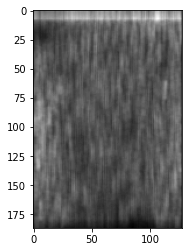

In [64]:
plt.imshow(np.reshape(N[0:si,26],(187,128)),cmap='gray')

In [65]:
df = pd.DataFrame(N)
df

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,71.0,124.0,61.0,164.0,49.0,204.0,44.0,157.0,38.0,137.0,...,17.0,12.0,16.0,45.0,16.0,45.0,16.0,45.0,16.0,45.0
1,99.0,8.0,87.0,192.0,70.0,45.0,62.0,77.0,53.0,88.0,...,24.0,17.0,23.0,64.0,23.0,64.0,22.0,109.0,22.0,109.0
2,91.0,252.0,82.0,17.0,66.0,81.0,61.0,204.0,53.0,92.0,...,25.0,228.0,24.0,21.0,24.0,21.0,23.0,68.0,23.0,68.0
3,73.0,127.0,72.0,16.0,58.0,44.0,54.0,236.0,46.0,12.0,...,23.0,63.0,22.0,108.0,22.0,108.0,21.0,151.0,21.0,151.0
4,66.0,62.0,66.0,62.0,53.0,73.0,50.0,126.0,42.0,94.0,...,21.0,137.0,21.0,137.0,20.0,178.0,20.0,178.0,19.0,217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632955,15.0,115.0,11.0,219.0,15.0,115.0,12.0,196.0,17.0,51.0,...,18.0,16.0,18.0,16.0,18.0,16.0,18.0,16.0,17.0,51.0
2632956,15.0,117.0,11.0,221.0,14.0,146.0,11.0,221.0,15.0,117.0,...,15.0,117.0,16.0,86.0,15.0,117.0,15.0,117.0,14.0,146.0
2632957,21.0,155.0,15.0,115.0,16.0,84.0,14.0,144.0,14.0,144.0,...,15.0,115.0,15.0,115.0,14.0,144.0,14.0,144.0,14.0,144.0
2632958,28.0,35.0,21.0,122.0,20.0,163.0,17.0,18.0,17.0,18.0,...,15.0,82.0,15.0,82.0,15.0,82.0,15.0,82.0,14.0,111.0


In [66]:
name_columns=[]
c=1
for i in range(56):
    if i%2==0:
        name_columns.append(f"\u03BC{c}")                    # \u03BC = μ
    else:
        name_columns.append(f"\u03C3{c}")                   # \u03C3 = σ
        c+=1
# name_columns.append("c")
# name_columns.append("label")

In [67]:
df.columns=name_columns
df

,μ1,σ1,μ2,σ2,μ3,σ3,μ4,σ4,μ5,σ5,...,μ24,σ24,μ25,σ25,μ26,σ26,μ27,σ27,μ28,σ28
0,71.0,124.0,61.0,164.0,49.0,204.0,44.0,157.0,38.0,137.0,...,17.0,12.0,16.0,45.0,16.0,45.0,16.0,45.0,16.0,45.0
1,99.0,8.0,87.0,192.0,70.0,45.0,62.0,77.0,53.0,88.0,...,24.0,17.0,23.0,64.0,23.0,64.0,22.0,109.0,22.0,109.0
2,91.0,252.0,82.0,17.0,66.0,81.0,61.0,204.0,53.0,92.0,...,25.0,228.0,24.0,21.0,24.0,21.0,23.0,68.0,23.0,68.0
3,73.0,127.0,72.0,16.0,58.0,44.0,54.0,236.0,46.0,12.0,...,23.0,63.0,22.0,108.0,22.0,108.0,21.0,151.0,21.0,151.0
4,66.0,62.0,66.0,62.0,53.0,73.0,50.0,126.0,42.0,94.0,...,21.0,137.0,21.0,137.0,20.0,178.0,20.0,178.0,19.0,217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632955,15.0,115.0,11.0,219.0,15.0,115.0,12.0,196.0,17.0,51.0,...,18.0,16.0,18.0,16.0,18.0,16.0,18.0,16.0,17.0,51.0
2632956,15.0,117.0,11.0,221.0,14.0,146.0,11.0,221.0,15.0,117.0,...,15.0,117.0,16.0,86.0,15.0,117.0,15.0,117.0,14.0,146.0
2632957,21.0,155.0,15.0,115.0,16.0,84.0,14.0,144.0,14.0,144.0,...,15.0,115.0,15.0,115.0,14.0,144.0,14.0,144.0,14.0,144.0
2632958,28.0,35.0,21.0,122.0,20.0,163.0,17.0,18.0,17.0,18.0,...,15.0,82.0,15.0,82.0,15.0,82.0,15.0,82.0,14.0,111.0


In [68]:
df['c']=confidence
df['label']=lable

In [69]:
df

,μ1,σ1,μ2,σ2,μ3,σ3,μ4,σ4,μ5,σ5,...,μ25,σ25,μ26,σ26,μ27,σ27,μ28,σ28,c,label
0,71.0,124.0,61.0,164.0,49.0,204.0,44.0,157.0,38.0,137.0,...,16.0,45.0,16.0,45.0,16.0,45.0,16.0,45.0,1.000000,0
1,99.0,8.0,87.0,192.0,70.0,45.0,62.0,77.0,53.0,88.0,...,23.0,64.0,23.0,64.0,22.0,109.0,22.0,109.0,1.000000,0
2,91.0,252.0,82.0,17.0,66.0,81.0,61.0,204.0,53.0,92.0,...,24.0,21.0,24.0,21.0,23.0,68.0,23.0,68.0,1.000000,0
3,73.0,127.0,72.0,16.0,58.0,44.0,54.0,236.0,46.0,12.0,...,22.0,108.0,22.0,108.0,21.0,151.0,21.0,151.0,1.000000,0
4,66.0,62.0,66.0,62.0,53.0,73.0,50.0,126.0,42.0,94.0,...,21.0,137.0,20.0,178.0,20.0,178.0,19.0,217.0,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632955,15.0,115.0,11.0,219.0,15.0,115.0,12.0,196.0,17.0,51.0,...,18.0,16.0,18.0,16.0,18.0,16.0,17.0,51.0,0.384071,0
2632956,15.0,117.0,11.0,221.0,14.0,146.0,11.0,221.0,15.0,117.0,...,16.0,86.0,15.0,117.0,15.0,117.0,14.0,146.0,0.387785,0
2632957,21.0,155.0,15.0,115.0,16.0,84.0,14.0,144.0,14.0,144.0,...,15.0,115.0,14.0,144.0,14.0,144.0,14.0,144.0,0.382638,0
2632958,28.0,35.0,21.0,122.0,20.0,163.0,17.0,18.0,17.0,18.0,...,15.0,82.0,15.0,82.0,15.0,82.0,14.0,111.0,0.382339,0


In [70]:
Dctr=pd.concat([df.iloc[si*15:si*16,:],df.iloc[si*33:si*34,:],df.iloc[si*82:si*83,:],df.iloc[si*99:si*100,:]],axis=0)
Dcts=df.drop(Dctr.index)
print(len(Dctr),len(Dcts),4*si,106*si)

95744 2537216 95744 2537216


In [71]:
xtsc,ytsc=Dcts.iloc[:,:-1],Dcts.iloc[:,-1]
xtrc,ytrc=Dctr.iloc[:,:-1],Dctr.iloc[:,-1]

# Learn with less

In [72]:
from sklearn import tree
def Node_count(classifier):      # calculating number of nodes and depth per tree in forest
    node=[]                    
    depth=[]
    for i in range(len(classifier.estimators_)):  # classifier.estimators_= n_estimators =50
        N=classifier.estimators_[i].tree_.node_count
        D=classifier.estimators_[i].tree_.max_depth
        node.append(N)
        depth.append(D)
    return node,depth
        

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
modelc=RandomForestClassifier(n_estimators=50, criterion='gini',
                              max_depth=None, min_samples_leaf=50, max_features='sqrt', verbose=1, n_jobs=-1)
modelc.fit(xtrc,ytrc)                  # training
Nc,Dc=Node_count(modelc)
ypsc=modelc.predict(xtsc)
accuracy_score(ytsc,ypsc) * 100

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    5.2s finished


97.0376191857532

In [172]:
R0,R1,R2=sum(ytsc==0),sum(ytsc==127),sum(ytsc==255)

0

In [173]:
len(ypsc),len(ytsc)

(2537216, 2537216)

In [179]:
if ypsc[1234]==0 and ytsc[1234]==0:
    print('abc')
else:
    print('xyz')

abc


In [176]:
len(ypsc)

2537216

In [180]:
c0,c1,c2=0,0,0
ytsc=list(ytsc)
for index in range(len(ypsc)):
    if ypsc[index]==0 and ytsc[index]==0:
        c0+=1
    elif ypsc[index]==127 and ytsc[index]==127:
        c1+=1
    elif ypsc[index]==255 and ytsc[index]==255:
        c2+=1

In [181]:
# c0,c1,c2=sum(ypsc==0),sum(ypsc==127),sum(ypsc==255)
print(c0/R0,c1/R1,c2/R2)

0.9865805253671748 0.5967783248427584 0.7003862212943632


In [74]:
len(ypsc)

2537216

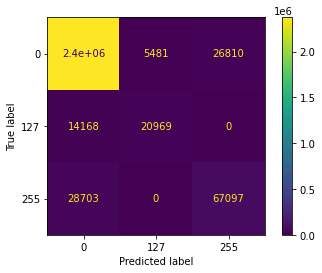

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
cmc=confusion_matrix(ytsc,ypsc,labels=[0,127,255])
disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=[0,127,255])
disp.plot()

In [113]:
def visualize_nodes_depth(Node,Depth):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.hist(Node,color='blue')
    plt.ylabel("Number of trees")
    plt.xlabel("Number of nodes")
    plt.title("Distribution of nodes per tree")

    plt.subplot(122)
    plt.hist(Depth,color='green')
    plt.ylabel("Number of trees")
    plt.xlabel("Depth of tree")
    plt.title("Distribution of depth of tree")
    plt.suptitle(f"Distribution of Nodes and Tress for LWLPO",fontsize=16)
    plt.show()

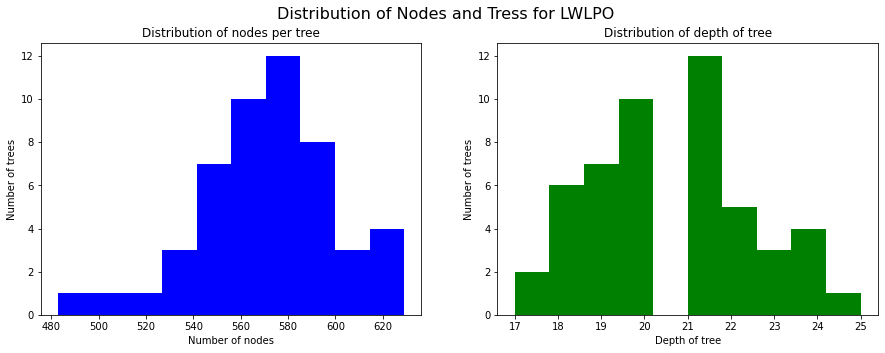

In [114]:
visualize_nodes_depth(Nc,Dc)

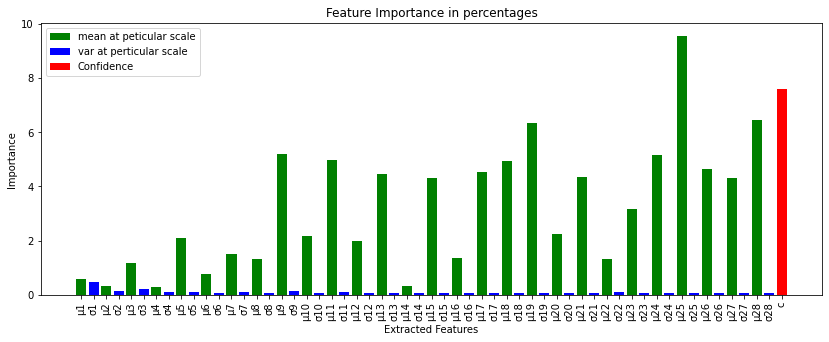

In [117]:
imp=[x*100 for x in modelc.feature_importances_]
n=len(imp)
plt.figure(figsize=(14,5))
pos1=[i for i in range(n-1) if i%2==0]
value1=[imp[i] for i in range(n-1) if i%2==0]
plt.bar(pos1,value1,color='green',label='mean at peticular scale')
pos2=[i for i in range(n-1) if i%2!=0]
value2=[imp[i] for i in range(n-1) if i%2!=0]
plt.bar(pos2,value2,color='blue',label="var at perticular scale")
plt.bar([56],imp[56],color='red',label="Confidence")
plt.xlabel("Extracted Features")
plt.ylabel("Importance")
plt.title("Feature Importance in percentages") 
pos=sorted(pos1+pos2)+[56]
plt.xticks(pos,df.columns[:-1],rotation='vertical')
plt.legend(loc="upper left")
plt.show()

In [76]:
Predicted_img=[]
for i in range(106):
    img1=ypsc[i*si:i*si+si]
    img1=np.reshape(img1,(187,128))
    Predicted_img.append(img1)

In [77]:
def param(i,p):
    OH,OW=187,128    ## shape of output image
    si=OH*OW 
    m=df.iloc[i*si:(i+1)*si,p].tolist()
    m=np.reshape(m,(OH,OW))
#     m=(m-np.min(m))/(np.max(m)-np.min(m))
#     m=np.multiply(m,255)
    return m

In [106]:
def meansstd_visualize(i):     # excluding 15,33,82,99
    plt.figure(figsize=(14,8))

    plt.subplot(171)
    data=IMAGE[i]
    plt.imshow(data[:187,:],cmap='gray')
    plt.title("original_image")
    plt.axis('off')
    
    plt.subplot(172)
    data=LABLE[i]
    plt.imshow(data,cmap='gray')
    plt.title("Groundtruth")
    plt.axis('off')

    plt.subplot(173)
    data=param(i,26)
    plt.imshow(data,cmap='gray')
    plt.title("14th scale mean")
    plt.axis('off')

    plt.subplot(174)
    data=param(i,27)
    plt.imshow(data,cmap='gray')
    plt.title("14th scale std")
    plt.axis('off')

    plt.subplot(175)
    data=param(i,54)
    plt.imshow(data,cmap='gray')
    plt.title("28th scale mean ")
    plt.axis('off')

    plt.subplot(176)
    data=param(i,55)
    plt.imshow(data,cmap='gray')
    plt.title("28th scale std")
    plt.axis('off')
    
    if i>15 and i<33: i-=1
    elif i>33 and i<82: i-=2
    elif i>82 and i<99: i-=3
    elif i>99: i-=4
    plt.subplot(177)
    plt.imshow(Predicted_img[i],cmap='gray')
    plt.title("Predicted")
    plt.axis('off')

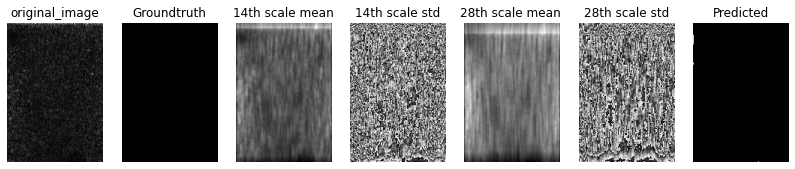

In [107]:
meansstd_visualize(0)

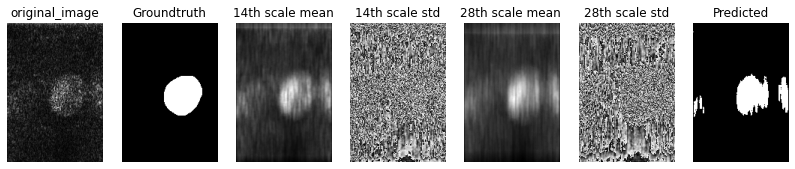

In [108]:
meansstd_visualize(13)

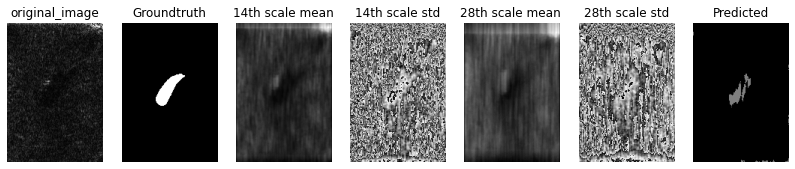

In [109]:
meansstd_visualize(104)

# Learn with more

In [118]:
xtsc1,ytsc1=Dcts.iloc[:,:-1],Dcts.iloc[:,-1]
xtrc1,ytrc1=Dctr.iloc[:,:-1],Dctr.iloc[:,-1]

In [121]:
modelr=RandomForestClassifier(n_estimators=50, criterion='gini',
                              max_depth=None, min_samples_leaf=50, max_features='sqrt', verbose=1, n_jobs=-1)
modelr.fit(xtsc1,ytsc1)                  # training
Nc,Dc=Node_count(modelc)
yprc=modelr.predict(xtrc1)
accuracy_score(ytrc1,yprc) * 100

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.2s finished


96.32039605614973

In [182]:
C0,C1,C2=0,0,0
ytrc1=list(ytrc1)
for ans in range(len(yprc)):
    if yprc[ans]==0 and ytrc1[ans]==0:
        C0+=1
    elif yprc[ans]==127 and ytrc1[ans]==127:
        C1+=1
    elif yprc[ans]==255 and ytrc1[ans]==255:
        C2+=1
        

In [183]:
r0,r1,r2=sum(ytrc==0 ),sum(ytrc==127),sum(ytrc==255)
print(C0/r0,C1/r1,C2/r2)

0.9872691876585452 0.8173307729236677 0.753334310420636


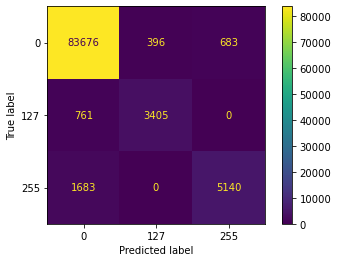

In [126]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
cmr=confusion_matrix(ytrc1,yprc,labels=[0,127,255])
disp = ConfusionMatrixDisplay(confusion_matrix=cmr, display_labels=[0,127,255])
disp.plot()

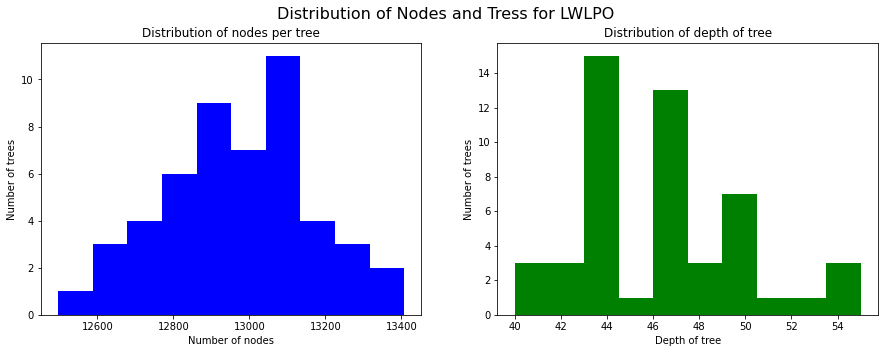

In [127]:
visualize_nodes_depth(Nc,Dc)

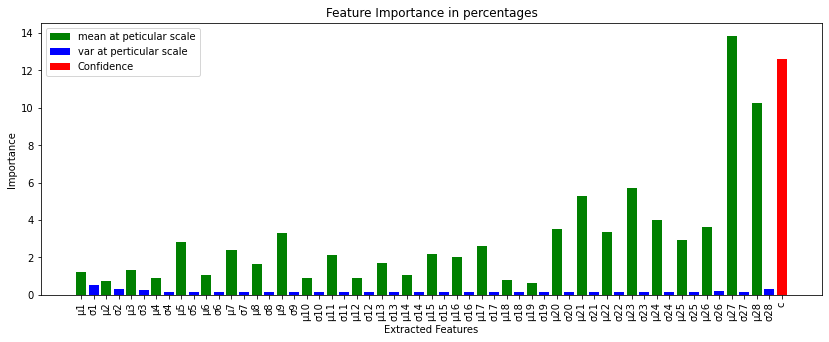

In [128]:
imp=[x*100 for x in modelr.feature_importances_]
n=len(imp)
plt.figure(figsize=(14,5))
pos1=[i for i in range(n-1) if i%2==0]
value1=[imp[i] for i in range(n-1) if i%2==0]
plt.bar(pos1,value1,color='green',label='mean at peticular scale')
pos2=[i for i in range(n-1) if i%2!=0]
value2=[imp[i] for i in range(n-1) if i%2!=0]
plt.bar(pos2,value2,color='blue',label="var at perticular scale")
plt.bar([56],imp[56],color='red',label="Confidence")
plt.xlabel("Extracted Features")
plt.ylabel("Importance")
plt.title("Feature Importance in percentages") 
pos=sorted(pos1+pos2)+[56]
plt.xticks(pos,df.columns[:-1],rotation='vertical')
plt.legend(loc="upper left")
plt.show()

In [147]:
Predicted_r=[]
for i in range(4):
    img=yprc[i*si:i*si+si]
    img1=np.reshape(img,(187,128))
    Predicted_r.append(img1)

In [148]:
len(Predicted_r)

4

In [150]:
def meansstd_visualize(i,j):     # excluding 15,33,82,99
    plt.figure(figsize=(14,8))

    plt.subplot(171)
    data=IMAGE[i]
    plt.imshow(data[:187,:],cmap='gray')
    plt.title("original_image")
    plt.axis('off')
    
    plt.subplot(172)
    data=LABLE[i]
    plt.imshow(data,cmap='gray')
    plt.title("Groundtruth")
    plt.axis('off')

    plt.subplot(173)
    data=param(i,26)
    plt.imshow(data,cmap='gray')
    plt.title("14th scale mean")
    plt.axis('off')

    plt.subplot(174)
    data=param(i,27)
    plt.imshow(data,cmap='gray')
    plt.title("14th scale std")
    plt.axis('off')

    plt.subplot(175)
    data=param(i,54)
    plt.imshow(data,cmap='gray')
    plt.title("28th scale mean ")
    plt.axis('off')

    plt.subplot(176)
    data=param(i,55)
    plt.imshow(data,cmap='gray')
    plt.title("28th scale std")
    plt.axis('off')

    plt.subplot(177)
    plt.imshow(Predicted_r[j],cmap='gray')
    plt.title("Predicted")
    plt.axis('off')

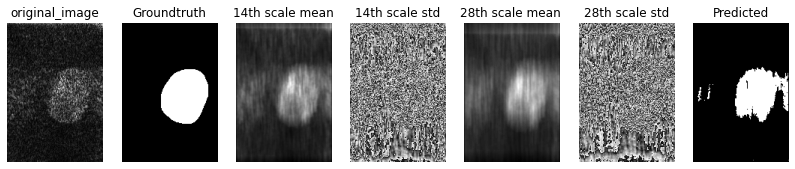

In [151]:
meansstd_visualize(15,0)

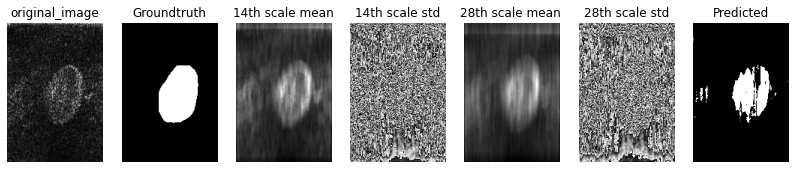

In [152]:
meansstd_visualize(33,1)

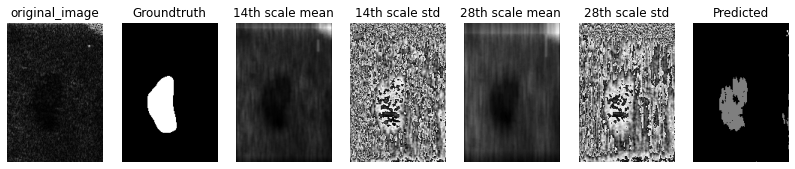

In [153]:
meansstd_visualize(82,2)

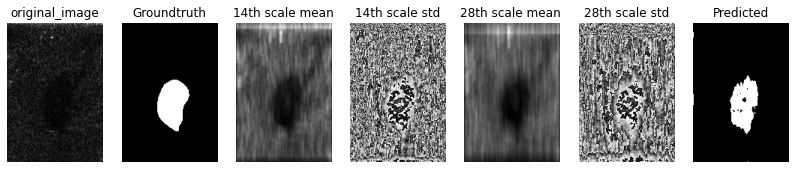

In [154]:
meansstd_visualize(99,3)

In [157]:
np.unique(Predicted_r[3])

array([  0, 127], dtype=uint8)